# t-Tests

***

In [1]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

## Normal Distribution

***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac{x - \mu}{\sigma}\big)^2 } $

In [2]:
def normal_pdf(x, mu=0.0, sigma=1.0):
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

**Standard Normal**

$\mu = 0$ and $\sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} x^2 } $

In [3]:
# Middle of the standard normal pdf.
normal_pdf(0.0)

0.3989422804014327

In [4]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line.
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

0.8920620580763857

In [5]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line.
normal_pdf(0.0, mu=-2.0, sigma=np.sqrt(0.5))

0.010333492677046035

## Plots

***

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/p5/gbbj70z56s93crkg2tqz_k740000gn/T/ipykernel_1386/388423260.py:10: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')
/var/folders/p5/gbbj70z56s93crkg2tqz_k740000gn/T/ipykernel_1386/388423260.py:10: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')


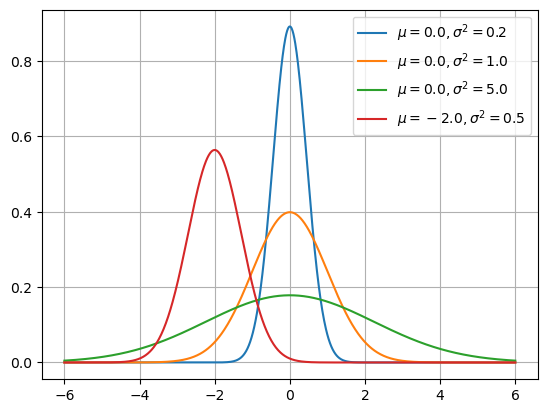

In [6]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-6.0, 6.0, 1001)

# Plot various values for pdf.
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add a legend.
ax.legend()

# Add a grid.
ax.grid()

## Area Under the Curve

***

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/p5/gbbj70z56s93crkg2tqz_k740000gn/T/ipykernel_1386/3773695449.py:10: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')
/var/folders/p5/gbbj70z56s93crkg2tqz_k740000gn/T/ipykernel_1386/3773695449.py:10: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')


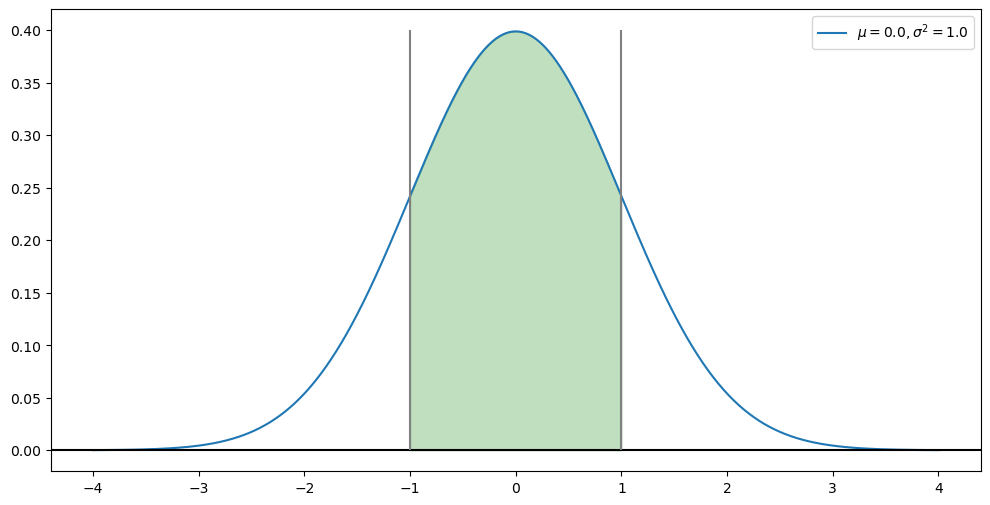

In [7]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12,6))

# Range of x values.
x = np.linspace(-4.0, 4.0, 1001)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis.
ax.axhline(0.0, color='black')

# Add vertical lines.
ax.vlines([-1.0, 1.0], 0.0, 0.4, color="grey")

# x values between the vertical lines.
x_interval = np.linspace(-1.0, 1.0, 101)

# Shade the area under the blue curve between the vertical lines.
ax.fill_between(x_interval, normal_pdf(x_interval), color='green', alpha=0.25)

# Add a legend.
ax.legend();

In [8]:
# The intersection of the grey and blue lines.
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'( 1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
( 1.0, 0.24197072451914337)


## Normal Data

***

In [9]:
# Generate some random normal data.
random_data = np.random.standard_normal(100000)

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/p5/gbbj70z56s93crkg2tqz_k740000gn/T/ipykernel_1386/2567606258.py:10: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');
/var/folders/p5/gbbj70z56s93crkg2tqz_k740000gn/T/ipykernel_1386/2567606258.py:10: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');


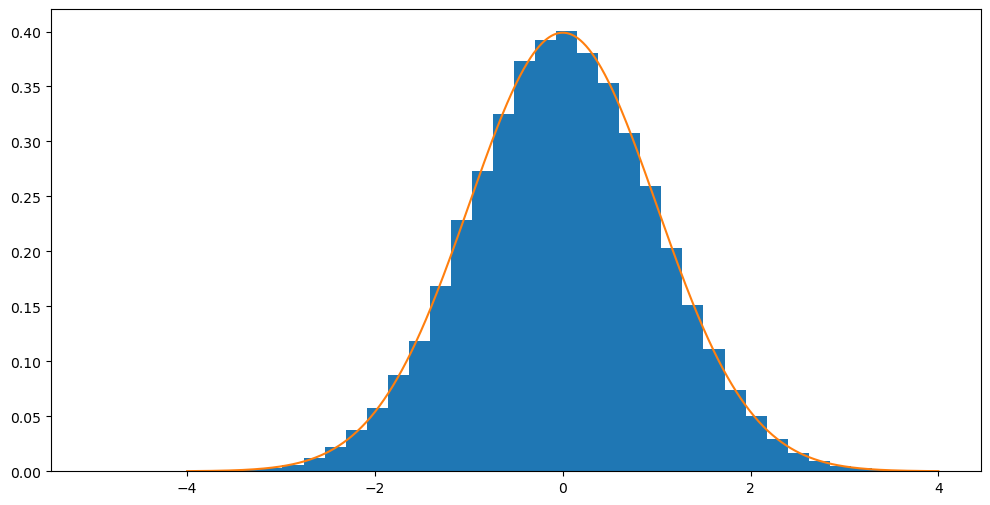

In [10]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot a histogram of the data.
ax.hist(random_data, bins=40, density=True)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');



## Sampling Distribution

***

In [11]:
# Generate some random normal data.
random_data = np.random.standard_normal((10000, 25))

# Show.
random_data

array([[ 0.5759962 ,  0.72199782, -0.25936423, ...,  0.44156361,
        -2.04970103,  0.45613322],
       [ 1.16640457,  1.88131305,  0.73450036, ..., -0.92929493,
         1.43094515, -0.26120901],
       [ 0.62322202, -0.66456837, -0.90579114, ...,  0.15471215,
        -0.3185338 ,  0.06712031],
       ...,
       [-1.07973876, -1.87968151, -0.07018203, ...,  0.34330547,
        -0.97639745, -0.28322067],
       [ 0.04920853,  0.7736457 ,  1.11220275, ..., -0.04496918,
        -1.34125783, -0.0367132 ],
       [ 0.98533694,  1.15257853, -0.99619129, ...,  1.57101159,
         2.00534334,  0.3209508 ]])

In [12]:
# Mean across the rows.
random_data.mean(axis=1)

array([ 0.09944781,  0.48253137,  0.11893397, ..., -0.23098747,
       -0.10100182,  0.04392802])

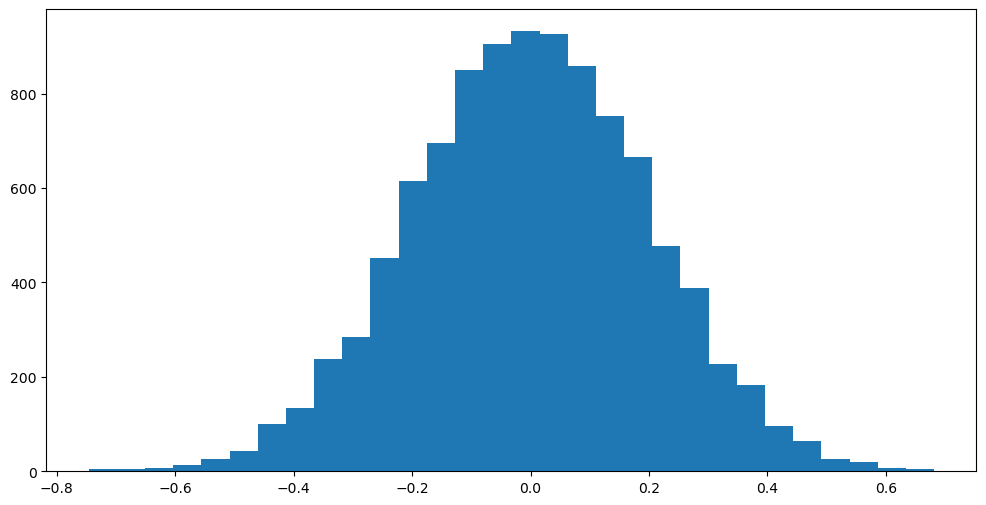

In [13]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30);

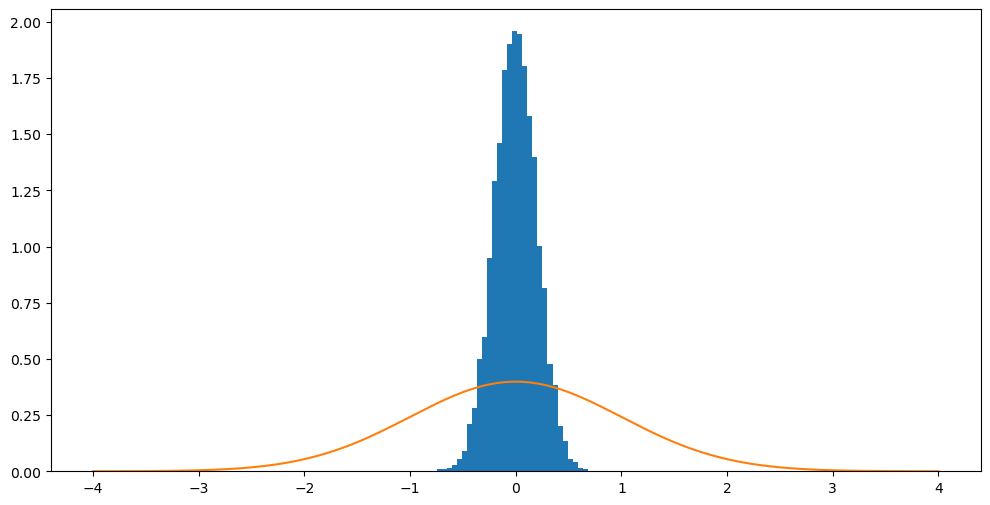

In [14]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y);

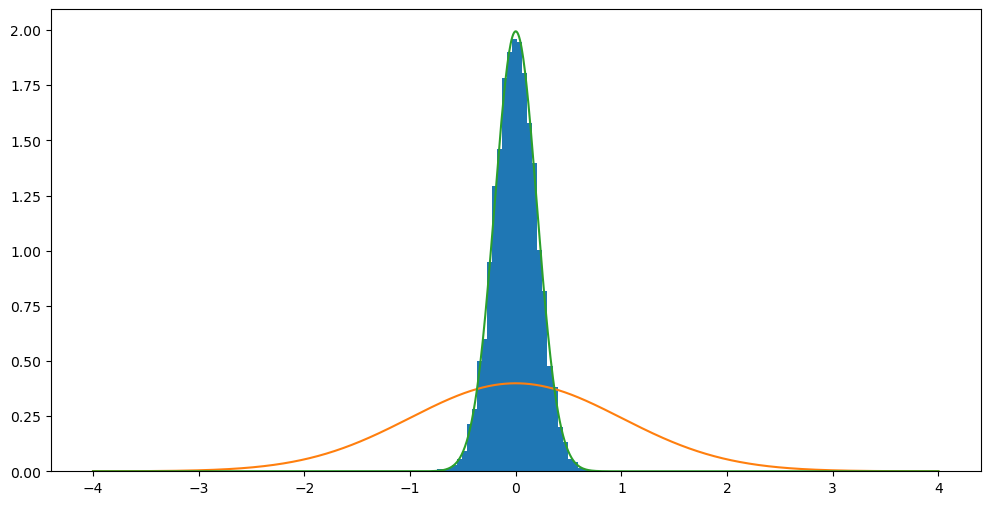

In [15]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot normal distribution with mu = 0.0 and sigma = 0.2.
y = normal_pdf(x, mu=0.0, sigma=0.2)
ax.plot(x, y);

## Random Normal

***

In [16]:
# Let's pick a random mean value.
random_mu = np.random.uniform(-3.0, 3.0)

# Show.
# random_mu

In [17]:
# Generate some random normal data with this unknown mu.
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show.
random_data

array([[-2.1737353 , -3.05460088, -1.64732293, ..., -1.64807334,
        -2.37350174, -1.7029918 ],
       [-2.23571349, -0.34501709, -2.79806159, ..., -2.08202218,
        -2.76667266, -2.34449796],
       [-1.20790128, -2.74344197, -1.6527085 , ..., -1.81792717,
        -1.34393632, -1.98989469],
       ...,
       [-1.2628554 , -1.64225457, -0.35446208, ..., -1.36897314,
        -1.51888624, -3.24498946],
       [-3.06262875, -3.00044741, -2.33496236, ..., -1.65589257,
        -1.06314739,  0.22828403],
       [-3.24510115, -2.20203762, -0.50938193, ..., -2.8807506 ,
        -1.49199965, -2.76074261]])

(array([7.67407001e-03, 9.59258752e-03, 1.91851750e-02, 3.83703501e-02,
        9.97629102e-02, 1.93770268e-01, 2.91614661e-01, 4.37421991e-01,
        6.58051504e-01, 1.07628832e+00, 1.31994004e+00, 1.58661398e+00,
        1.79573238e+00, 1.97031748e+00, 2.00676931e+00, 1.81683608e+00,
        1.49836217e+00, 1.30459190e+00, 1.05518463e+00, 8.00021799e-01,
        4.83466411e-01, 3.29985011e-01, 2.01444338e-01, 9.40073577e-02,
        3.45333151e-02, 2.11036925e-02, 2.30222100e-02, 5.75555251e-03,
        3.83703501e-03, 1.91851750e-03]),
 array([-2.71903092, -2.66690734, -2.61478376, -2.56266018, -2.5105366 ,
        -2.45841302, -2.40628944, -2.35416586, -2.30204228, -2.2499187 ,
        -2.19779512, -2.14567154, -2.09354797, -2.04142439, -1.98930081,
        -1.93717723, -1.88505365, -1.83293007, -1.78080649, -1.72868291,
        -1.67655933, -1.62443575, -1.57231217, -1.52018859, -1.46806501,
        -1.41594143, -1.36381785, -1.31169427, -1.25957069, -1.20744711,
        -1.15532

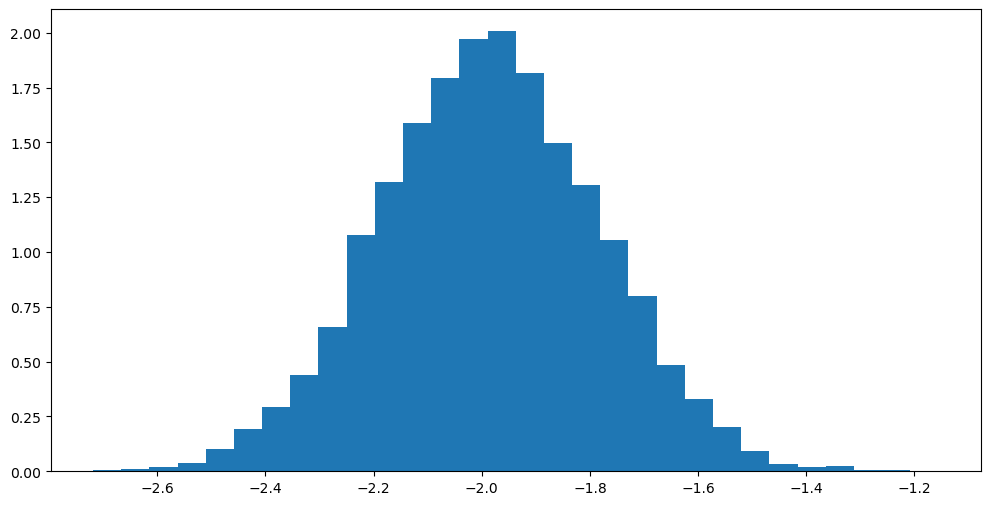

In [18]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

In [19]:
# Estimate random_mu from above histogram.
# Now look at the value.
random_mu

-1.9831124043613362

In [20]:
# A random sample of size 50.
sample = np.random.normal(random_mu, 1.0, 50)

# Show.
sample

array([-1.55193104, -2.75520121,  0.17444005, -2.12415862, -0.14070391,
       -2.10870488, -3.21414273, -1.63224885, -2.42905807, -1.28745398,
       -2.91053442, -0.72588359, -0.93709633,  0.09643598, -1.3881403 ,
       -1.95859919, -0.31168676, -1.28160935, -1.62465233, -1.77452579,
       -1.92503684, -5.04948586, -1.6677422 , -1.88038376, -1.4694927 ,
       -1.79301254, -0.79770302, -1.9113741 , -0.7404421 , -3.14364064,
       -3.15236464, -2.64356811, -0.19198678, -1.40021303, -2.09168557,
       -0.6018183 , -1.90736388, -1.52865052, -2.01827859, -1.60521621,
       -1.52353539, -2.10928192, -3.68336991, -2.61460287,  0.33173856,
       -1.37332334, -2.93939768, -0.63514024, -2.21204308, -1.00316987])

In [21]:
# Calculate the mean of the sample.
sample.mean()

-1.703340808668976

## Independent Samples t-test

***

In [22]:
# Load Iris.
df = pd.read_csv('data/iris.csv')

# Show.
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
# Setosa petal length.
sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [24]:
# Virginica petal length.
sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [25]:
# t-test.
ss.ttest_ind(sample_a, sample_b)

TtestResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71, df=98.0)

***

## End